<a href="https://colab.research.google.com/github/22Shivani22/EDA/blob/main/ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name: Mobile Price Range Prediction**

**ML Classification Project Done by SHIVANI YADAV**

**Done Individually**

# **Project Summary**

  In this project i have given a dataset of mobile price range prediction. Firstly i have imported the given csv file to the colab notebook. Then imported the important libraries. By exploring the dataset i have found that the given dataset consists of 2000 rows and 21 columns. In this dataset the info is of two types:int(64) and float(64). The given dataset does not contain any duplicate value and missing value. By moving further i have used various basic function such as head(),tail(),info(),describe(),etc.In variable description i have described all my variables.Then i have checked the unique values for each variable.I n this dataset the cost of mobile range prices are divided into four types:low, medium, high, very high. Which are denoted by 0,1,2,3. Then i have counted the count of mobiles which belongs to these price range and all the price range have equal number of mobiles. As there are no null and duplicate value i have not performed data wrangling. T hen i have plotted tables between the variables like the mobile has 4G or not, have bluetooth or not etc. After that i have performed the data visualisation, started with univariate analysis, in this i have plotted a pie chart of price range. Then i have plotted histogram for all the independent variables. Also plotted boxplots and bargraphs in visualisation.And also performed multivariate analysis by plotting heatmap. After the data visualisation part i have started to implement ML models. Firstly, i have used the Linesr regression model and calculated the train score, test score and then precision value, recall value and f1 score. And then i have performed hyperparameter optimization then i got more accuracy of 90% in this model. After this i implemented my second model thst is K-Nearest Neighbors classifier in this also i have calculated the train score, test score, precision value, recall value, and f1 score. Similarly, lastly i have implementd Naive Bayes Classifier.Among all three the accuracy of Linear regression model was very high. So, i have chosen linear regression model for mobile price range prediction.

  

# **GitHub Link**

 # **Problem Statement**

 In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 

**Objective:** Find out some relation between features of a mobile phone (eg: RAM, internal memory, etc.) and it's selling price. Inthis problem we don't have to predict the actual price but a price range indicating how high the price is.

# **Let's Begin**

# **Know your data**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Mobile price range prediction data
database = ('/content/drive/MyDrive/data_mobile_price_range.csv')
Mobile_Price_Data = pd.read_csv(database)

# **Dataset First Look**

In [ ]:
#Let's have first look on our datase
Mobile_Price_Data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
#Importing first 5 rows of our dataset
Mobile_Price_Data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Importing last 5 rows of our dataset
Mobile_Price_Data.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
#Length of our datset
len(Mobile_Price_Data)

2000

In [ ]:
#Let's know the shape of our dataset
Mobile_Price_Data.shape

(2000, 21)

# **Rows and Columns Count**

In [ ]:
#Rows and Columns count of our datset
print(Mobile_Price_Data.index)
print(Mobile_Price_Data)
print(Mobile_Price_Data.columns)

RangeIndex(start=0, stop=2000, step=1)
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height 

# **Information of the dataset**

In [ ]:
#Info of our dataset
Mobile_Price_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Duplicate Values**

In [ ]:
#Duplicate Values in our datset
len(Mobile_Price_Data[Mobile_Price_Data.duplicated()])

0

# **Missing Values/ Null Values**

In [ ]:
#Finding the count of missing values or null values of our dataset
print(Mobile_Price_Data.isnull().sum().sort_values(ascending= False))

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64


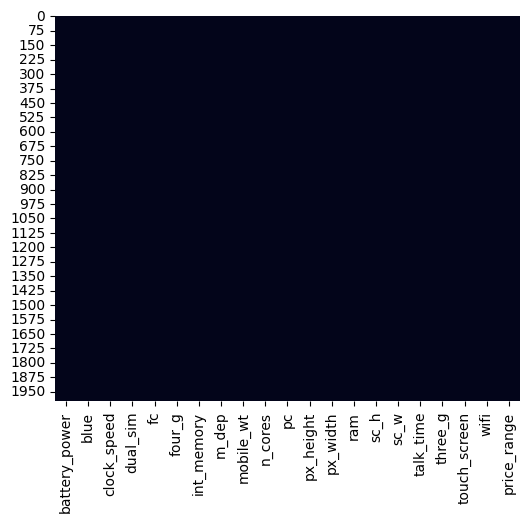

In [ ]:
 #Checking null value by plotting Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(Mobile_Price_Data.isnull(), cbar=False)
plt.show()

# **What did you know about your dataset?**



* The given dataset consists of 2000 rows and 21 columns.
* The datatypes present in the dataset is int and float. 



* The dataset doesn't consists of duplicate values.
* The dataset doesn't consists of missing values.








# **Understanding Your Variables**

In [ ]:
#Dataset Columns
print(Mobile_Price_Data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
#Dataset Describe
Mobile_Price_Data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# **Variables Description**

**1. Battery_power:** The capacity of the battery in mAh.

**2.Blue:**  Does the device has bluetooth or not.

**3.Clock_speed:** The speed at which microprocessor executes instructions.

**4.Dual_sim:** Does the device has dual sim support or not.

**5. Fc:** Front camera megapixels.

**6. Four_g:** Has 4G or not.

**7.int_memory:** The device's internal memory capacity 

**8.M_dep:** Mobile depth in cm.

**9.MObile_wt:** Weight of the mobile phone.

**10.N_cores:** Number of cores in processor.

**11.Pc:** Primary camera megapixels.

**12.Px_height:** pixel resolution height.

**13.Px_width:** pixel resolution width.

**14.Ram:** Random Access Memory in MB.

**15.Sc_h:** Screen height.

**16.Sc_w:** Screen width.

**17.Talk_time:** Longest that a single battery can last over a call.

**18.Three_g:** Has 3G or not.


**19.Wifi:** Has Wifi or not.

**20.Price_range:**This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost), 3(very high cost).

# **Check Unique Values for each Variable**

In [ ]:
#Check unique values for each variable
for i in Mobile_Price_Data.columns.tolist():
  print("Number of unique values in", i, "is", Mobile_Price_Data[i].nunique())

Number of unique values in battery_power is 1094
Number of unique values in blue is 2
Number of unique values in clock_speed is 26
Number of unique values in dual_sim is 2
Number of unique values in fc is 20
Number of unique values in four_g is 2
Number of unique values in int_memory is 63
Number of unique values in m_dep is 10
Number of unique values in mobile_wt is 121
Number of unique values in n_cores is 8
Number of unique values in pc is 21
Number of unique values in px_height is 1137
Number of unique values in px_width is 1109
Number of unique values in ram is 1562
Number of unique values in sc_h is 15
Number of unique values in sc_w is 19
Number of unique values in talk_time is 19
Number of unique values in three_g is 2
Number of unique values in touch_screen is 2
Number of unique values in wifi is 2
Number of unique values in price_range is 4


# **Data Wrangling**


The given dataset doesn't consists any duplicate or missing value so there is no need of performing data wrangling on the given dataset.

**Checking how many mobiles from the dataset belongs to price range 0,1,2,3**

In [ ]:
#Checking how many mobile belongs to price range 0
print("Number of mobile belongs to price range 0 is", len(Mobile_Price_Data[Mobile_Price_Data['price_range']==0]))

Number of mobile belongs to price range 0 is 500


In [ ]:
#Checking how many mobile belongs to price range 1
print("Number of mobile belongs to price range 1 is", len(Mobile_Price_Data[Mobile_Price_Data['price_range']==1]))

Number of mobile belongs to price range 1 is 500


In [ ]:
#Checking how many mobile belongs to price range 2
print("Number of mobile belongs to price range 2 is", len(Mobile_Price_Data[Mobile_Price_Data['price_range']==2]))

Number of mobile belongs to price range 2 is 500


In [ ]:
#Checking how many mobile belongs to price range 3
print("Number of mobile belongs to price range 3 is", len(Mobile_Price_Data[Mobile_Price_Data['price_range']==3]))

Number of mobile belongs to price range 3 is 500


**Value Counts for price range column**

In [ ]:
Mobile_Price_Data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**Plotting tabluar form for mobile phones thatt support 4G and that of which do not support 4G**

In [ ]:
#Mobile phones groupby which supports 4G and which do not support 4G.
Mobile_Price_Data.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,four_g,price_range,Count
3,0,3,225
2,0,1,238
1,0,0,241
7,1,2,247
0,0,2,253
6,1,0,259
5,1,1,262
4,1,3,275


**Plotting tabluar form for mobile phones thatt support bluetooth and that of which do not support bluetooth**

In [ ]:
#Mobile phones groupby which supports bluetooth and which do not support bluetooth.
Mobile_Price_Data.groupby('blue')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,blue,price_range,Count
3,0,3,241
6,1,0,243
7,1,2,243
5,1,1,245
2,0,1,255
0,0,0,257
1,0,2,257
4,1,3,259


**Plotting tabluar form for mobile phones thatt support dual sim and that of which do not support dual sim**

In [ ]:
#Mobile phones groupby which supports dual sim and which do not support dual sim.
Mobile_Price_Data.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,dual_sim,price_range,Count
3,0,3,235
2,0,1,245
7,1,2,249
1,0,0,250
6,1,0,250
0,0,2,251
5,1,1,255
4,1,3,265


**Plotting tabluar form for mobile phones thatt support touch screen and that of which do not support touch screen**

In [ ]:
#Mobile phones groupby which supports touch screen and which do not support touch screen
Mobile_Price_Data.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,touch_screen,price_range,Count
7,1,2,235
3,0,0,238
2,0,1,239
6,1,3,248
1,0,3,252
5,1,1,261
4,1,0,262
0,0,2,265


**Storing the columns of different unique values in one variable(Independent values). And storing the columns of same unique values in one variable(Dependent values)**

In [ ]:
#Storing independent values in one variable
Dfrnt_Unique_Values= Mobile_Price_Data[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]
print(Dfrnt_Unique_Values)

      battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  ta

In [ ]:
#Storing dependent values in one variable
Same_Unique_Values=Mobile_Price_Data[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
print(Same_Unique_Values)

      blue  dual_sim  four_g  three_g  touch_screen  wifi
0        0         0       0        0             0     1
1        1         1       1        1             1     0
2        1         1       1        1             1     0
3        1         0       0        1             0     0
4        1         0       1        1             1     0
...    ...       ...     ...      ...           ...   ...
1995     1         1       1        1             1     0
1996     1         1       0        1             1     1
1997     0         1       1        1             1     0
1998     0         0       1        1             1     1
1999     1         1       1        1             1     1

[2000 rows x 6 columns]


# **Insights found**

I have described each variables. And then i have checked the unique values for each variables. And i found that all my columns has unique variable counts.The unique value count for px_height is the highest that is 1137. And the least value for unique value count is 2 which is for the columns 'blue', 'dula_sim',  'four_g', 'three_g', 'touch_screen', 'wifi'. Then i have checked how many mobile belongs to price range 0, 1, 2,3. All the four price ranges have equal number of mobile counts that is 500. Then i have plotted tabluars for the mobiles which supports 4G and not, Which mobile has dual sim which do not have,etc.

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Chart 1

**Univariate Analysis**

<Axes: ylabel='price_range'>

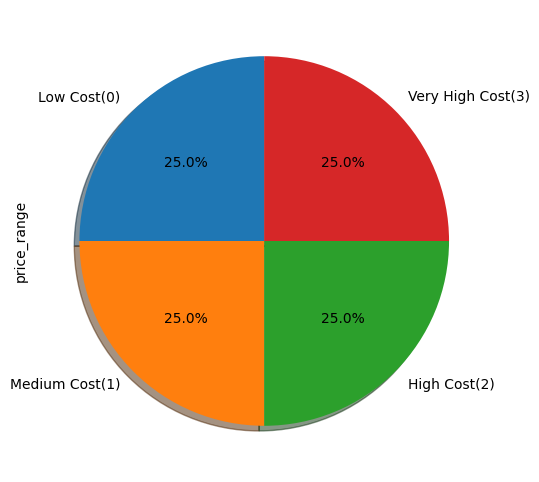

In [ ]:
#Plotting pie chart for the price range variable
Mobile_Price_Data['price_range'].value_counts().plot(kind='pie', figsize=(7,6), autopct="%1.1f%%", startangle=90, shadow=True, labels=["Low Cost(0)", "Medium Cost(1)","High Cost(2)", "Very High Cost(3)"])

**Reason for picking the above chart:** A pie chart expresses a part to whole relationship in your data. It's easy to explain the percentage comparison through the are covered in  a circle with different colors. Where different percentage comparison comes into action, there pie chart is more oftenly used. So, here i used the pie chart which helped me to get the percentage comparison of dependent variables.

**Insights found from the graph:** From the pie chart i found that out of total 2000 dataset, there are 500 mobile data that is 25% which is of low cost, 500 mobile data of medium cost, 500 mobile data of high cost and 500 mobile data of very high cost.

**Impact:** All the mobile price range are equally important people buy all ranges mobiles so there is positive impact from business point of view.

# Chart 2

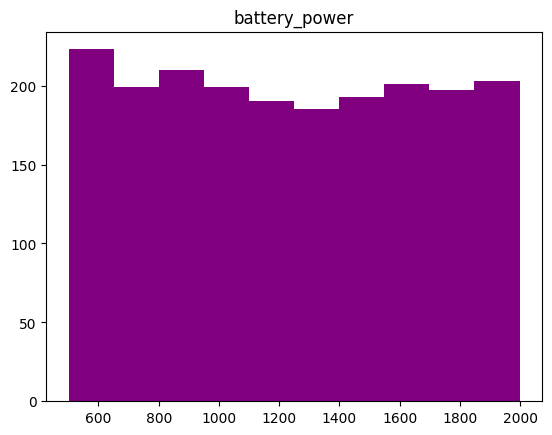

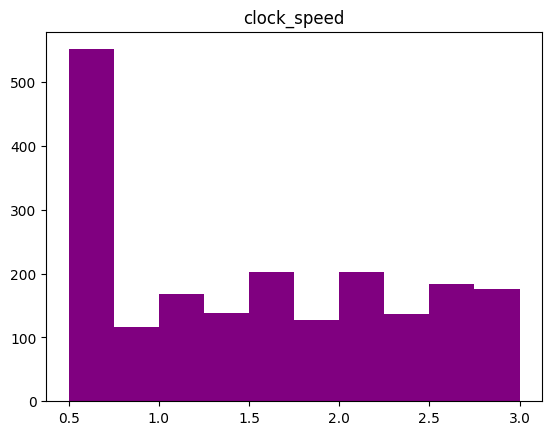

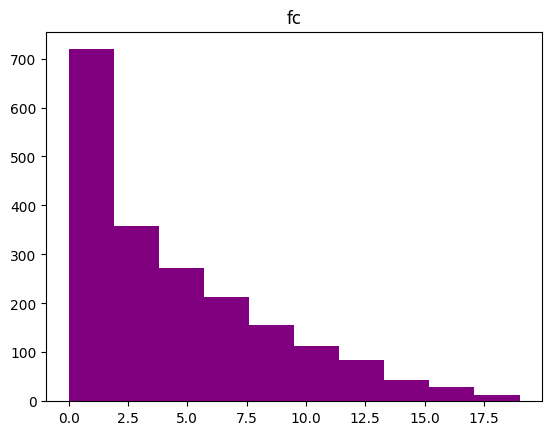

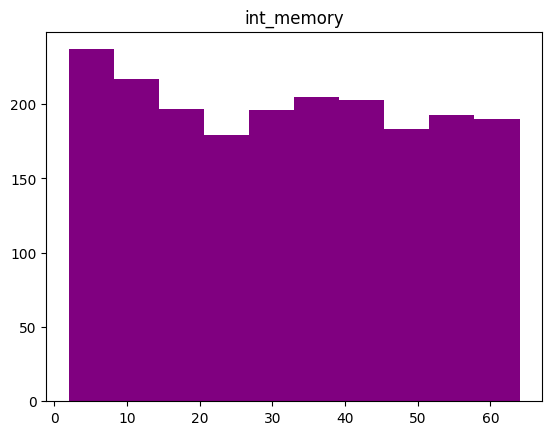

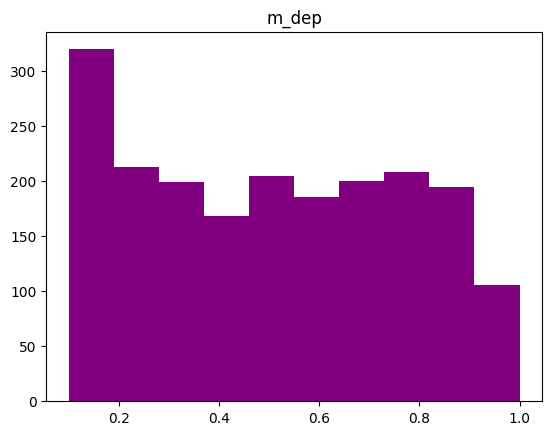

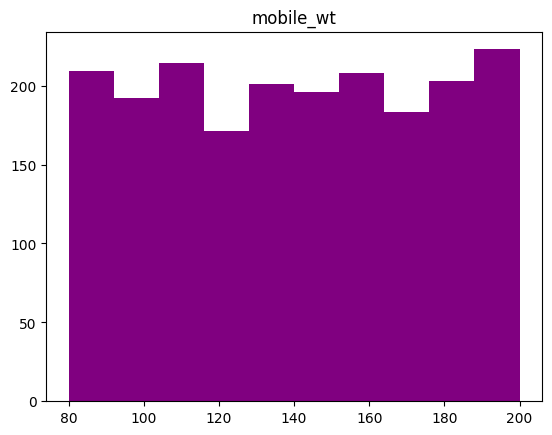

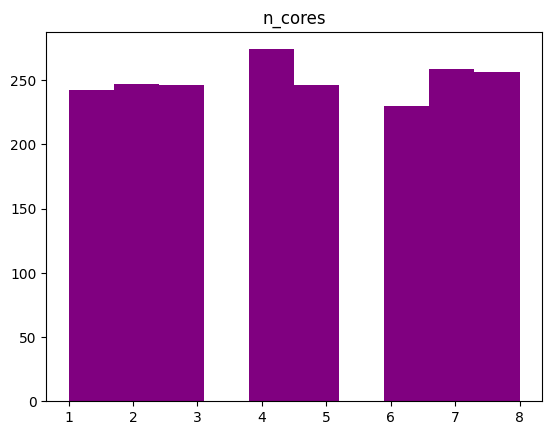

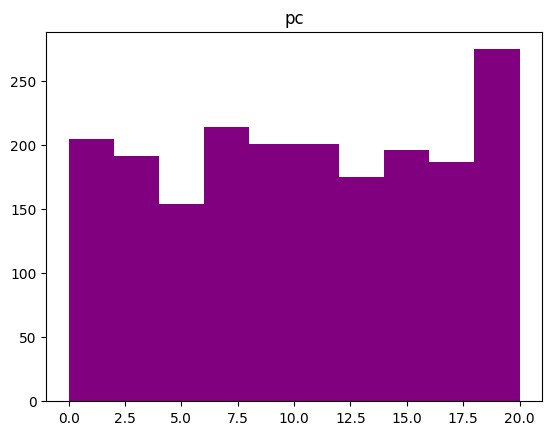

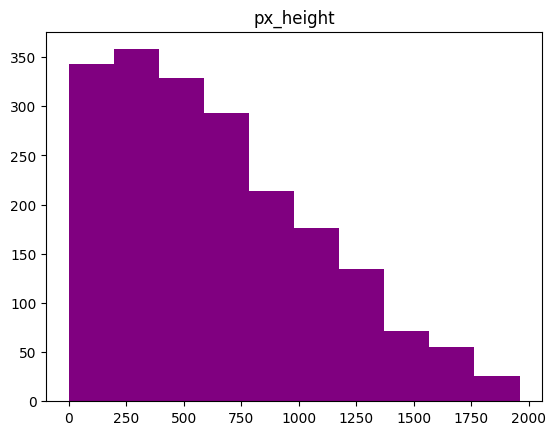

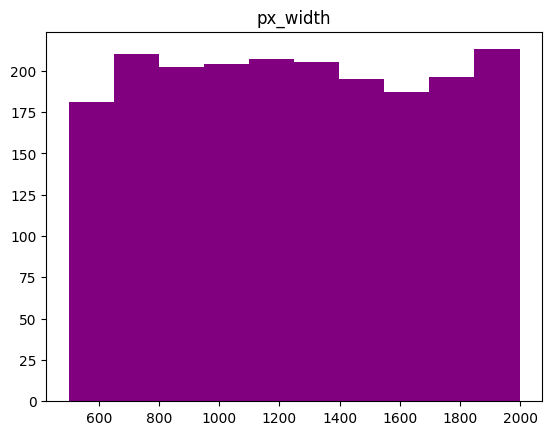

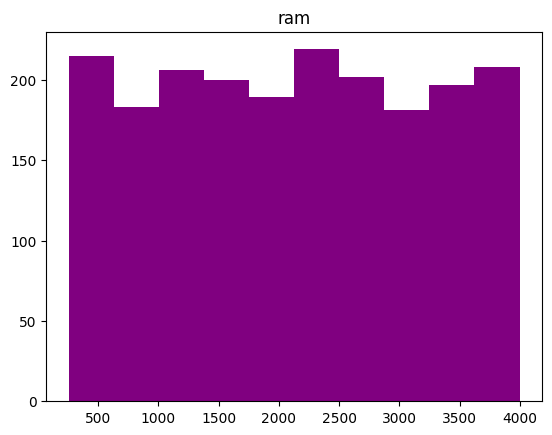

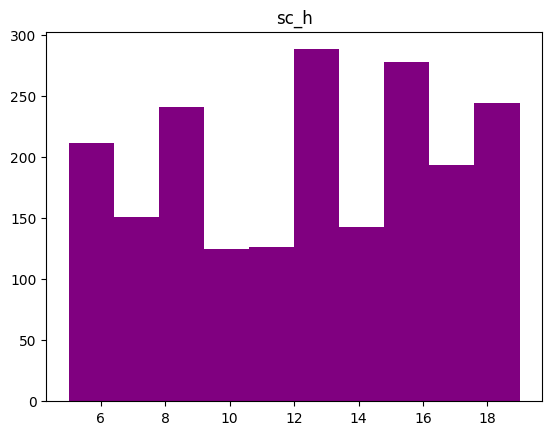

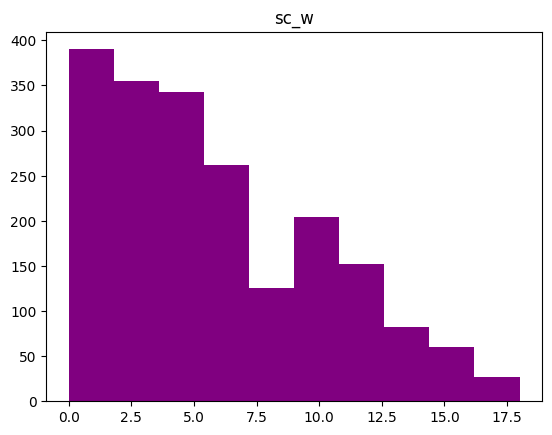

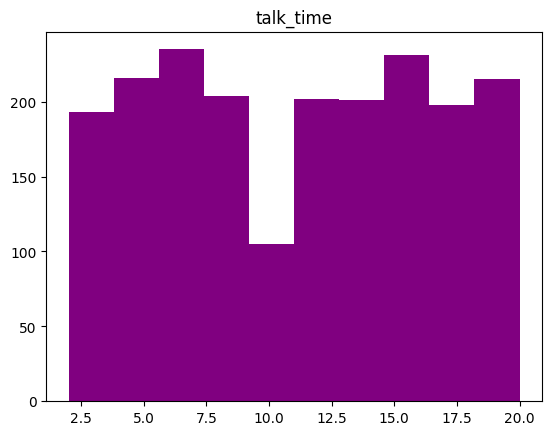

In [ ]:
#Plotting histogram for independent variables
for i in Dfrnt_Unique_Values.columns:
  plt.hist(Mobile_Price_Data[i],color='purple')
  plt.title(i)
  plt.show()

**Reason for picking the above chart:** In histogram plot we can check all the numerical columns and we can check the frequency very easily.

**Insights found from the graph:** From the above histogram i have found the frquencies of the independent variables.

# Chart 3

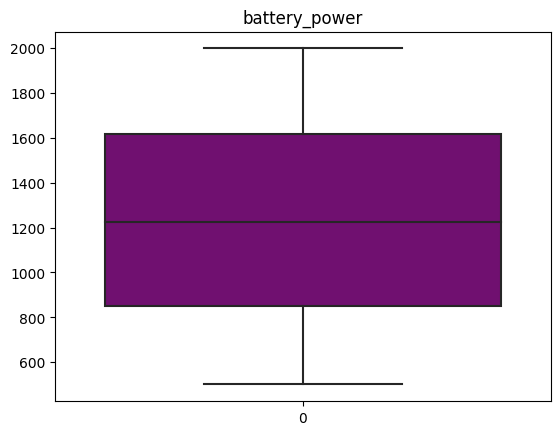

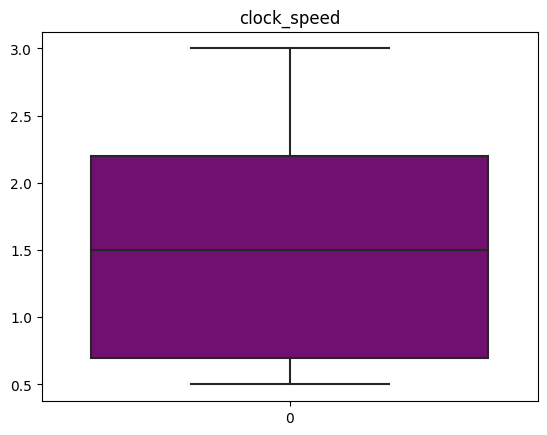

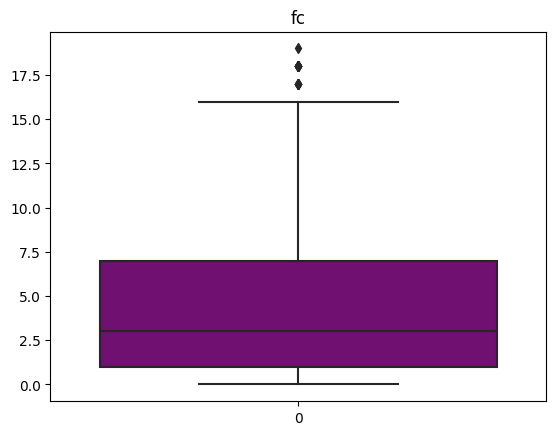

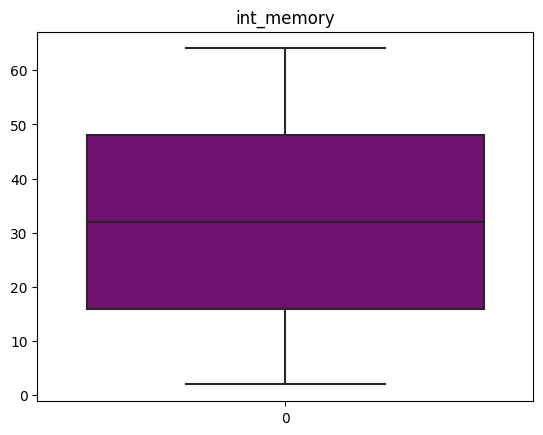

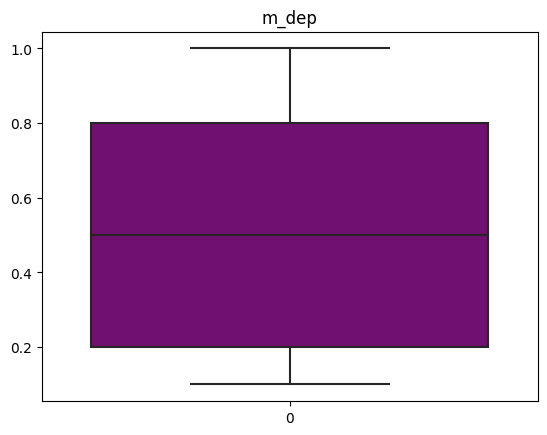

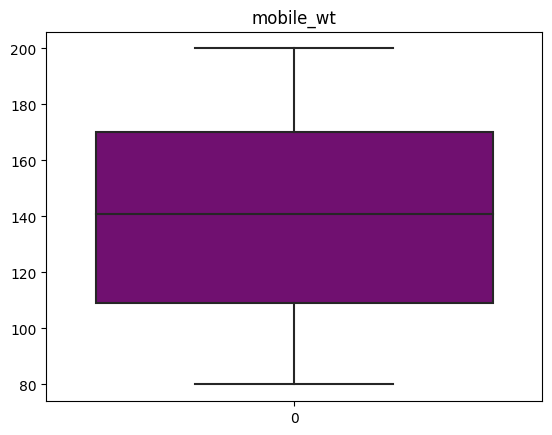

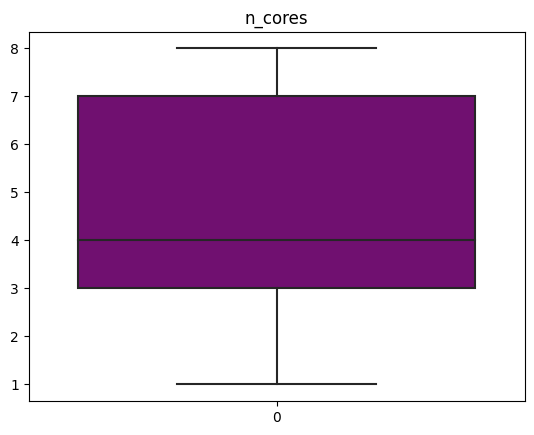

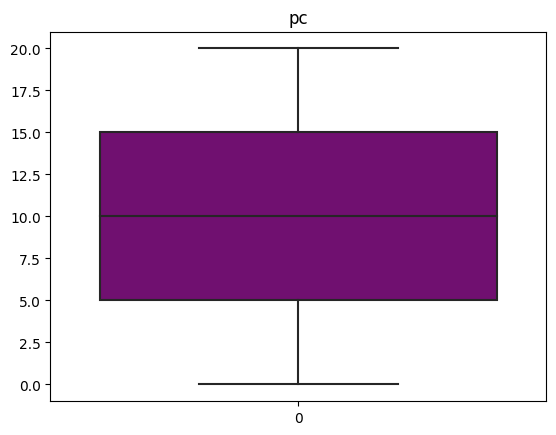

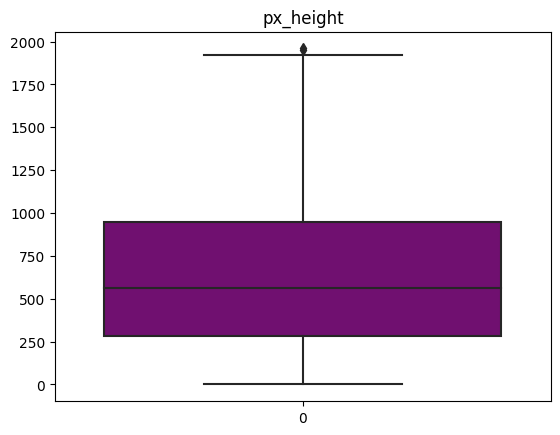

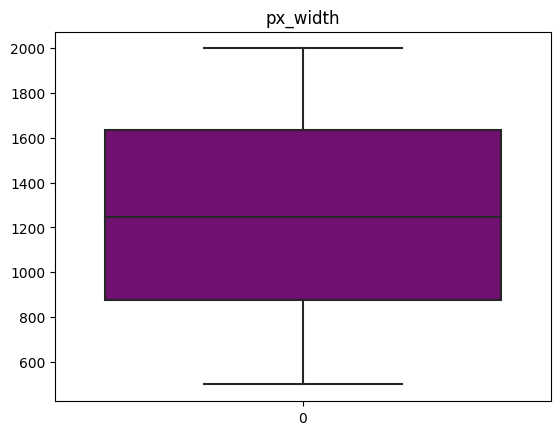

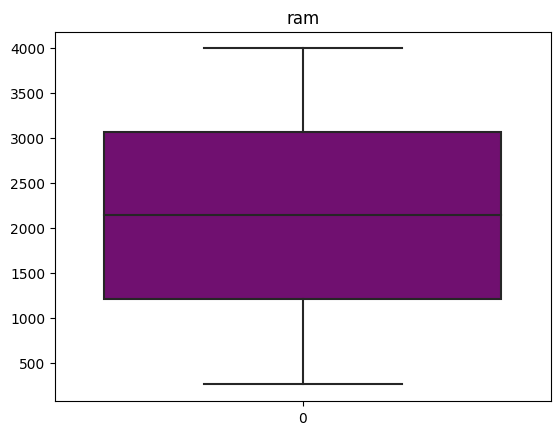

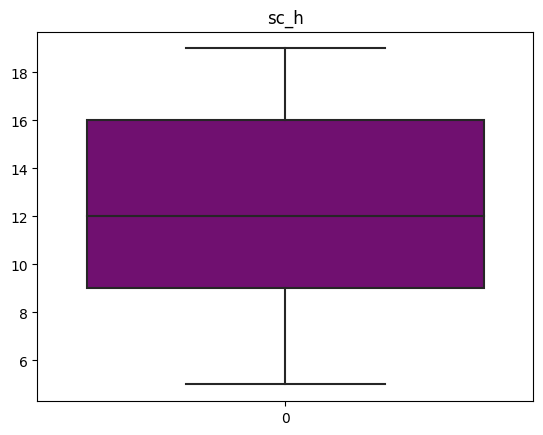

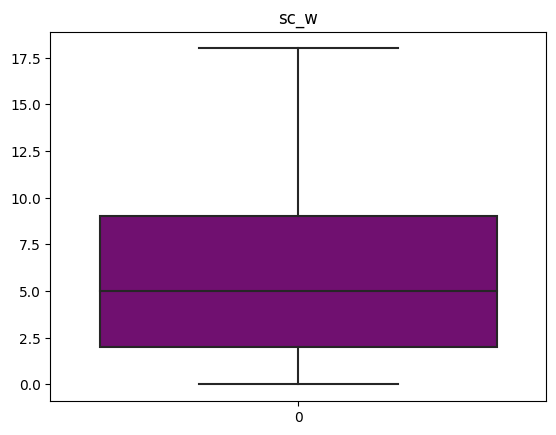

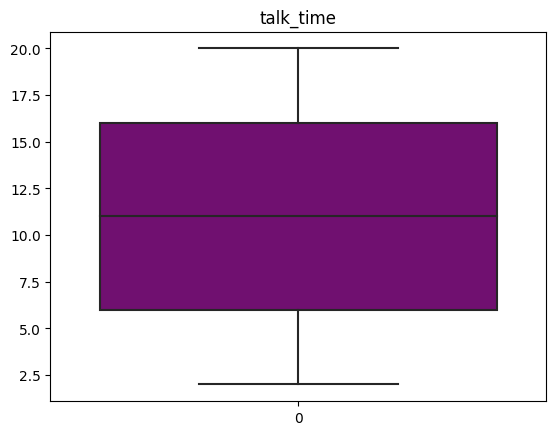

In [ ]:
#Plotting boxplots for dealing with outliers
for i in Dfrnt_Unique_Values.columns:
  sns.boxplot(Dfrnt_Unique_Values[i], color='purple')
  plt.title(i)
  plt.show()

**Reason for picking the above chart:** Boxplots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. 

**Insights found from the graph:** Almost all columns are symmetrically distributed and mean is nearly same with median for independent columns. There are only three values in the particular columns.



**Impact:** Boxplot does not explain the business impact. It's done just to see the distribution of the column data over the dataset.

# Chart 4 

In [ ]:
#Storing the four g and three g column in one variable
Binary_Features= ['four_g', 'three_g']

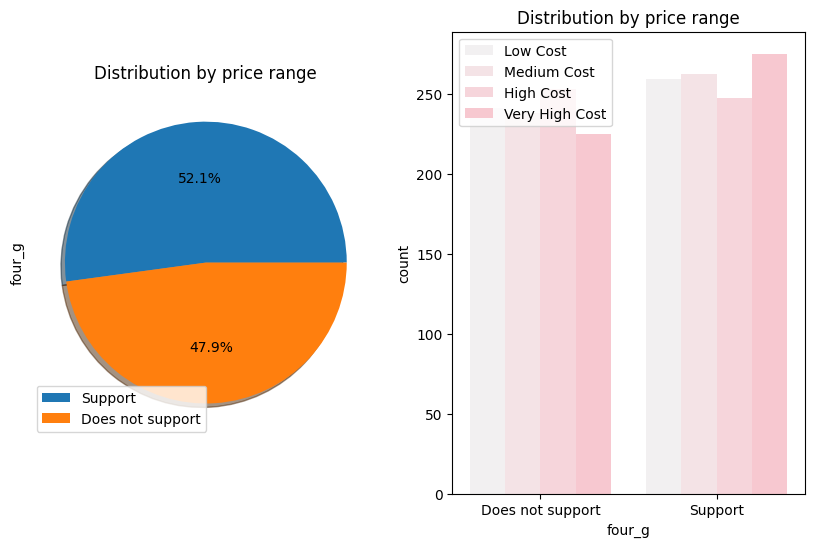

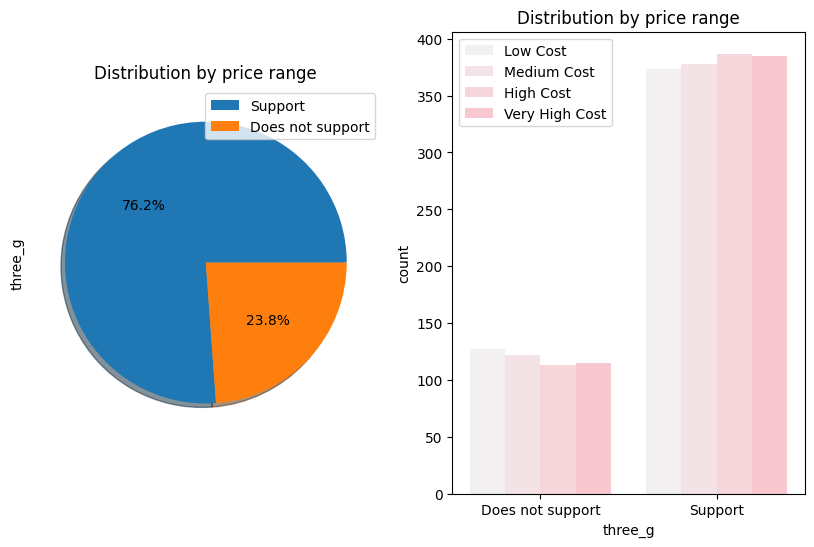

In [ ]:
#Plot of binary features against price range
for col in Binary_Features:
  fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(10,6))

  Mobile_Price_Data[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not support'])
  sns.countplot(x= col, hue='price_range', data= Mobile_Price_Data,  ax=ax2, color='pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost','High Cost','Very High Cost'])
  ax2.set_xticklabels(['Does not support', 'Support'])


**Reason for picking the above chart:** Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to four_g and three_g variables. Thus, i have used the pie chart to show the percentage of having which one support and which one not support.

The bar graph is used to compare the items between different groups of price range. 



**Insights found from the graph:**
For three_g: Support percentage is 76.2% and does not support percentage is 23.8%.

for four_g: Support percentage is 52.1% and does not support percentage is 47.9%.

# Chart 5

**Bivariate Analysis**

<Axes: xlabel='price_range', ylabel='battery_power'>

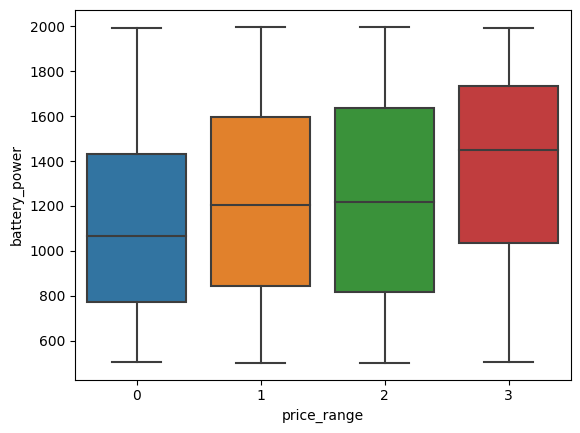

In [ ]:
#Boxplot for Battery power vs price range
sns.boxplot(x="price_range", y="battery_power", data=Mobile_Price_Data)

From the above boxplot graph i have found that as the price range is increasing from low to medium then to high to very high the battery power is also increasing.

# Chart 6

**Multivariate Analysis**

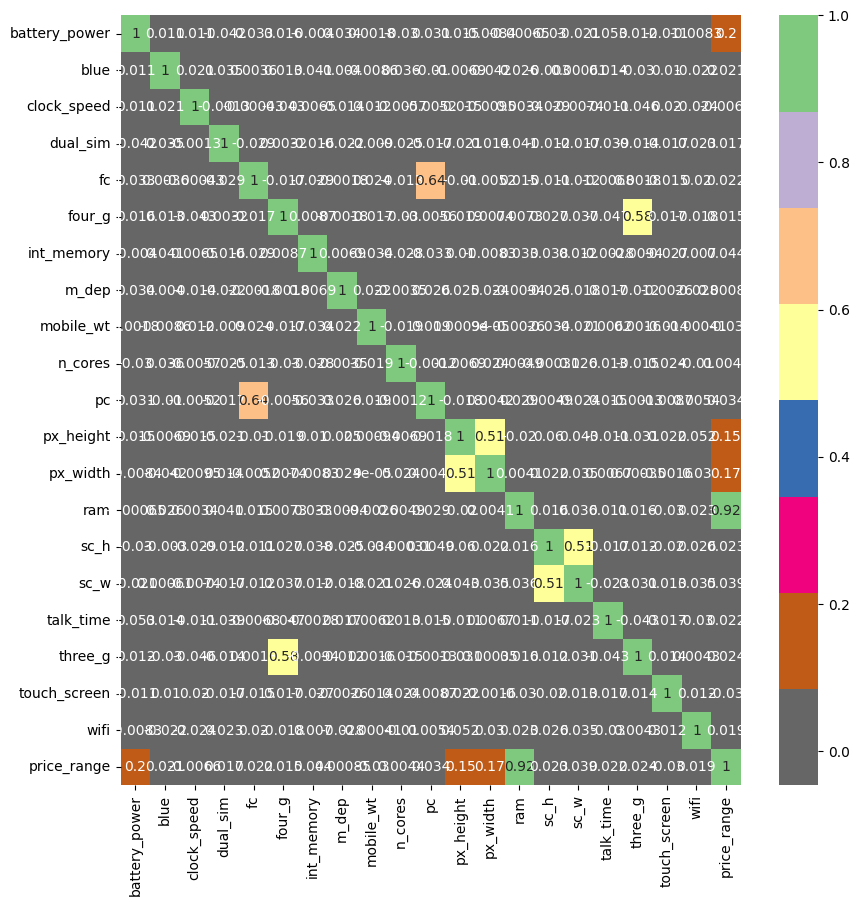

In [ ]:
#Plotting correlation heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(Mobile_Price_Data.corr(), annot=True, cmap=plt.cm.Accent_r)
plt.show()

**Reason for picking the above chart:** A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlattion matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analysis. The range of correlation is [-1,1].
Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap.

**Insights found from the graph:** From the above correlation heatmap:

1. The total price range is positively highly correlated with a value of 1.
2. The total ram is correlated with a value of 92%.
3. Total pc and fc are correlated with a value of 65%.

# **Solution to business objective**

The following can be few strategies to choose the prices;
1. Price based on value.
2. Price with the trend.
3. Knowing when to raise or lower the prices.
4. Use high-low strategies to attract customers.

# **Coming to Machine Learning Algorithm**

**Feature Selection with hypothesis test**

Chi-test: It helps to figure out relation between feature and label with "pvalue<=0.1"

In [ ]:
#Crossed the wifi and price range
ct= pd.crosstab(Mobile_Price_Data['wifi'], Mobile_Price_Data['price_range'])
from scipy.stats import chi2_contingency
stat, pvalue, dof, expected_R= chi2_contingency(ct)
print("pvalue: ", pvalue)

if pvalue<= 0.1:
  print("Alternate Hypothesis passed. int_memory and price_range have relationship")
else:
  print("Null hypothesis passed. int_memory and price_range does not have relationship")

pvalue:  0.8359905195342198
Null hypothesis passed. int_memory and price_range does not have relationship


In [ ]:
#Assigning new variable for pixels
Mobile_Price_Data['pixels']= Dfrnt_Unique_Values['px_height']*Dfrnt_Unique_Values['px_width']

#Dropping px_height and px_width
Mobile_Price_Data.drop(['px_height', 'px_width'], axis=1, inplace=True)

In [ ]:
#Defining x and y 
x= Mobile_Price_Data.drop(['price_range'], axis=1).values
y= Mobile_Price_Data['price_range'].values

In [ ]:
#Shape for x variable
x.shape

(2000, 19)

In [ ]:
#Shape for y variable
y.shape

(2000,)

In [ ]:
#Scaling values of x
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x= scaler.fit_transform(x)

# **Splitting training and testing data**

In [ ]:
#Separate the dataset in two type one trainings 75% 0f data and other testing to 25% of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1500, 19)
(500, 19)


# **ML model implementation**

Here i will be using Logistic regression, k_nearest neighbours, decision tree classifier and compare them, which algorithm is giving better result.

# **Model 1: Logistic Regression**

In [ ]:
#Applying logistic regression
logmodel= LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Checking the coefficients
logmodel.coef_

array([[-3.24593090e+00,  5.85553252e-02,  1.79711039e-01,
         4.97911255e-02, -1.70782669e-01, -3.85845551e-02,
        -2.42062698e-01, -1.05961540e-01,  3.50987694e-01,
         8.75820887e-02, -8.07282974e-02, -1.34566470e+01,
         5.66182078e-02, -6.76602454e-02, -2.51141488e-01,
        -1.35068800e-01,  1.65518511e-02,  1.27396757e-01,
        -4.07205607e+00],
       [-7.98092895e-01, -2.58574324e-02, -5.13895302e-02,
         2.37483956e-02,  6.20091318e-02,  8.10800761e-02,
         1.84697839e-02,  1.62084420e-01,  1.76596297e-01,
        -3.07222369e-01,  3.99231483e-02, -3.81373965e+00,
        -4.49276098e-02, -1.35434190e-01,  1.08117612e-01,
        -4.49249751e-02,  2.76826463e-02,  2.49025820e-02,
        -6.47994293e-01],
       [ 7.54878640e-01, -1.97361805e-02, -8.37132744e-02,
        -1.07213150e-01,  2.02829480e-01, -1.77075552e-01,
        -1.74948311e-01, -1.45822676e-01,  1.61632070e-01,
         1.32667234e-01, -1.06137031e-01,  4.04239667e+00,
    

In [ ]:
#Checking the intercept value
logmodel.intercept_

array([  8.09373443,   3.54713847,  -1.15402128, -10.48685162])

In [ ]:
#Prediction
trainscore= logmodel.score(x_train, y_train)
testscore= logmodel.score(x_test, y_test)
print("train score:{}".format(trainscore), '\n')
print("test score:{}".format(testscore), '\n')
y_predlogi= logmodel.predict(x_test)
print('f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')

#Get confusion matrix for both train and test
print(confusion_matrix(y_test, y_predlogi))

train score:0.916 

test score:0.908 

f1 score:  0.908 

[[124   8   0   0]
 [  5  98   6   0]
 [  0   8 100  11]
 [  0   0   8 132]]


In [ ]:
#Getting the values for precision, recall and classifiaction reort of y_test
print('precision score: ',precision_score(y_test, y_predlogi, average='micro'), '\n')
print('recall score: ',recall_score(y_test, y_predlogi, average='micro'), '\n')
print(classification_report(y_test, y_predlogi))

precision score:  0.908 

recall score:  0.908 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.86      0.90      0.88       109
           2       0.88      0.84      0.86       119
           3       0.92      0.94      0.93       140

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [ ]:
#Printing the probability value
probabilityvalues= logmodel.predict_proba(x)
auc= roc_auc_score(y, probabilityvalues,multi_class='ovr')
print(auc)

0.9874433333333332


**Result for logistic regression model**



* The training score is 91% and testing score is 90%.
* For testing dataset, i founfd the precision is 90%, recall as 90% and f1 score as 90%.


* As the results are not so good now i will perform hyperparameter tuning.





**Cross Validation and Hyperparameter Tuning**

In [ ]:
#Implementation with hyperparameter optimization techniques
param={'C': [0.01,0.1,1,10,100,110,120,130]}
grid=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

In [ ]:
#Predict on the model
trainscore= grid.score(x_train, y_train)
testscore= grid.score(x_test, y_test)
print("train score: {}".format(trainscore), '\n')
print("test score: {}".format(testscore), '\n')
y_predlopgi= grid.predict(x_test)
print ('f1 score: ', f1_score(y_test, y_predlogi, average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))

train score: 0.9493333333333334 

test score: 0.94 

f1 score:  0.908 

[[124   8   0   0]
 [  5  98   6   0]
 [  0   8 100  11]
 [  0   0   8 132]]


In [ ]:
print('precision score: ', precision_score(y_test, y_predlogi, average='micro'),'\n')
print('recall score: ', recall_score(y_test, y_predlogi, average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

precision score:  0.908 

recall score:  0.908 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.86      0.90      0.88       109
           2       0.88      0.84      0.86       119
           3       0.92      0.94      0.93       140

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



**Final result of logistic Rgression model**

I have used the logistic regression model. From this i got the training score as 90% and testing score as 90%.

For the testing data i found the precision as90% and recall as 90%.

For the low price range i got the value for precision as 96%, recall as 94% and f1 score as 95%.

For the medium price range i got the value for precision as 86%, recall as 90% and f1 score as 88%.

For the high price range i got the value for precision as 88%, recall as 84% and f1 score as 86%.

For the ver high price range i got the value for precision as 92%, recall as 94% and f1 score as 93%.

Linear regression model has the accuracy of 91%.

# **Model 2: KNN (K- Nearest Neighbours)**

In [ ]:
#Import Kneighboursclassifiers
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors= np.arange(1,100)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors)) 

for i,k in enumerate(neighbors):
  #Setup a KNN classifier with k neighbours
  knn= KNeighborsClassifier(n_neighbors=k)

  #Fit the model
  knn.fit(x_train, y_train)

  #Compute accuracy on the training set
  train_accuracy[i]= knn.score(x_train, y_train)
  #Compute accuracy on the test set
  test_accuracy[i]= knn.score(x_test, y_test)



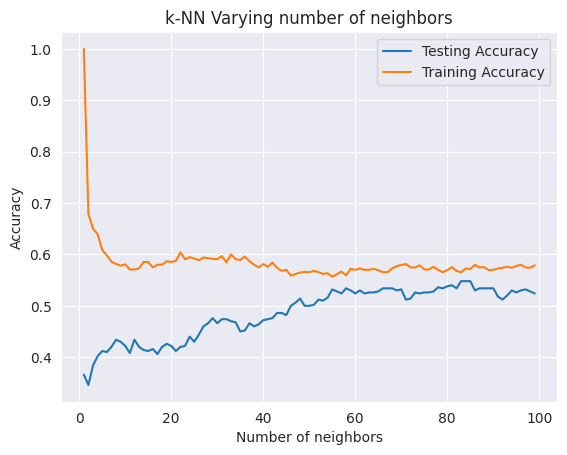

In [ ]:
#Generating plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn=KNeighborsClassifier(n_neighbors=90)
#Fit the model
knn.fit(x_train, y_train)
KNeighborsClassifier(n_neighbors=90)



KNeighborsClassifier(n_neighbors=90)

In [ ]:
#Predict the model
trainscore= knn.score(x_train, y_train)
testscore= knn.score(x_test, y_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi= knn.predict(x_test)
print('f1 score: ', f1_score(y_test, y_predlogi, average='micro'),'\n')
print(confusion_matrix(y_test,y_predlogi))

train score: 0.57 

test score: 0.534 

f1 score:  0.534 

[[92 37  3  0]
 [32 48 27  2]
 [ 8 34 61 16]
 [ 1  9 64 66]]


In [ ]:
print('precision score: ', precision_score(y_test,y_predlogi, average='micro'),'\n')
print('recall score: ', precision_score(y_test,y_predlogi, average='micro'),'\n')
print(classification_report(y_test,y_predlogi))

precision score:  0.534 

recall score:  0.534 

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       132
           1       0.38      0.44      0.41       109
           2       0.39      0.51      0.45       119
           3       0.79      0.47      0.59       140

    accuracy                           0.53       500
   macro avg       0.56      0.53      0.53       500
weighted avg       0.58      0.53      0.54       500



In [ ]:
probabilityValues= knn.predict_proba(x)
auc= roc_auc_score(y, probabilityValues, multi_class='ovr')
print(auc)

0.8015781666666666


**Final result of K Nearest Neighbour model**

I have used the knn model. From this i got the training score as 57% and testing score as 53%.

For the testing data i found the precision as 53% and recall as 53%.

For the low price range i got the value for precision as 69%, recall as 70% and f1 score as 69%.

For the medium price range i got the value for precision as 38%, recall as 44% and f1 score as 41%.

For the high price range i got the value for precision as 39%, recall as 51% and f1 score as 45%.

For the ver high price range i got the value for precision as 79%, recall as 47% and f1 score as 59%.

KNN model has the accuracy of 53%.


# **Model 3: Naive Bayes Classifier**

In [ ]:
#Implementing naive bayes classifier
NBmodel= GaussianNB()
NBmodel.fit(x_train, y_train)


GaussianNB()

In [ ]:
trainscore= NBmodel.score(x_train, y_train)
testscore= NBmodel.score(x_test, y_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predNB= NBmodel.predict(x_test)
print('f1 score: ', f1_score(y_test, y_predNB,average='micro'),'\n')
print(confusion_matrix(y_test,y_predNB))

train score: 0.814 

test score: 0.802 

f1 score:  0.802 

[[116  16   0   0]
 [  6  79  24   0]
 [  0  20  80  19]
 [  0   0  14 126]]


In [ ]:
print('precision score: ', precision_score(y_test,y_predNB, average='micro'),'\n')
print('recall score: ', recall_score(y_test,y_predNB, average='micro'),'\n')
print(classification_report(y_test, y_predNB))

precision score:  0.802 

recall score:  0.802 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       132
           1       0.69      0.72      0.71       109
           2       0.68      0.67      0.68       119
           3       0.87      0.90      0.88       140

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.81      0.80      0.80       500



In [ ]:
probabilityValues= NBmodel.predict_proba(x)
auc= roc_auc_score(y, probabilityValues, multi_class='ovr')
print(auc)

0.9518399999999999


**Finally we made result by naive bayes classifier**

I have used naive bayes algorithm to create the model. As i got not so good result. For training i got the score of 81% and for testing i  got 80%.

 For testing dataset i found precision of 80%, recall of 80% and f1 score of 80%. 
 
 I got low price range precision as 95%, and recall as 88% and f1 score as 91%.

 i got medium price range precision as 69%, and recall as 72% and f1 score as 71%.

 i got high price range precision as 68%, recall as 67% and f1 score as 88%.

 Finally for very high price range i got precision as 87%, recall as 90% and f1 score as 88%.

 Naive Bayes classifier has the accuracy of 80%.


# **Which model did you choose as final prediction and why?**

Among the three implemented model i have chosen the Linear Regression model ehich is hyperparameter optimized. First of all, i need accuracy for mobile price range prediction. From the three implemented model the accuracy of Linear Regression model is very high with 90% so i have chosen this model for final prediction.

# **Conclusion**

In this project we have looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings.
In this project:
1. From EDA we have seen that there are mobile phones in 4 price ranges. The number of elements are similar.
2. Half the devices have bluetooth and half of the devices doen't.
3. There is a gradual increase in battery power as the price range is increasing.
4.RAM has continuous increase with price range while moving from low to very high cost.
5. From all the experiments on the model got the conclusion that the Linear Regression model is very much accurate and it is preferrable for mobile price range prediction.